In [1]:
from pycausal import *
from pycausal.models import MDN
import matplotlib.pyplot as plt
import seaborn as sns
import torch

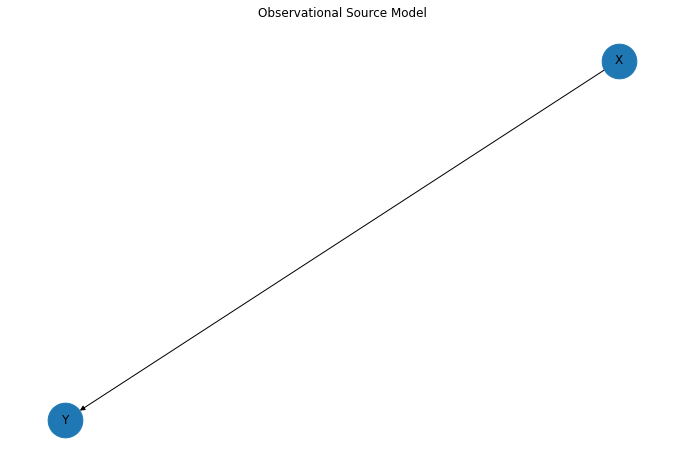

In [8]:
### (X^3 + X - X^2) * sin(X) 
base = SCM("Observational Source Model")
X = Variable("X", stats.uniform(-2,5))
Ny = HiddenVariable("Ny",stats.norm(0,0.5)) 

y2 = sin(X) * (-2) * X

Y = y2 + Ny << "Y"

base.draw()

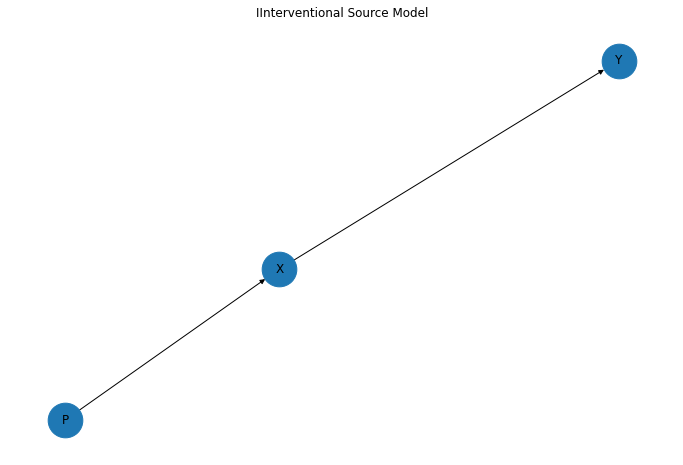

In [12]:
### with covariance shift
interv = SCM("Interventional Source Model")
iX = HiddenVariable("iX", stats.uniform(-2,5))
P = placeholder("P")

X = P + iX << "X"

Ny = HiddenVariable("Ny",stats.norm(0,0.5)) 

y2 = sin(X) * (-2) * X

Y = y2 + Ny << "Y"

Perturbation = HiddenVariable("Perturbation", stats.uniform(2,1))
transfer = interv.intervene({P: Perturbation})

transfer.draw()

In [17]:
## scatter
def plot(base, model,features="X",labels="Y"):
    #model = MDN([1,200], 12)
        
    smps= base._sample(300)
        
    xx = np.sort(smps[features].ravel()).reshape(-1,1)
    xx = torch.tensor(xx,dtype=torch.float32)

    pi, mu, sigma = model.forward(xx)
    
    #print(sigma)
    #pi = F.softmax(pi,dim=1)
    #sigma = torch.exp(sigma)


    a = torch.sum(pi * mu, dim=1)

    plt.scatter(smps[features], smps[labels],s =3)
    plt.plot(xx.numpy().ravel(), a.detach().numpy(),c="black")
    for i in range(model.components):
        plt.plot(xx.numpy().ravel(), mu[:,i].detach().numpy())
        #plt.plot(xx.numpy().ravel(), sigma[:,i].detach().numpy())

    plt.show()
    
    for i in range(model.components):
        #plt.plot(xx.numpy().ravel(), mu[:,i].detach().numpy())
        plt.plot(xx.numpy().ravel(), sigma[:,i].detach().numpy())
    plt.title("std")
    plt.show()
    
    for i in range(model.components):
        #plt.plot(xx.numpy().ravel(), mu[:,i].detach().numpy())
        plt.plot(xx.numpy().ravel(), pi[:,i].detach().numpy())
    plt.title("probs")
    plt.show()
    
    
    return model
#plot(transfer, modelxy,"X","Y")
#plot(transfer, modelyx,"Y","X")

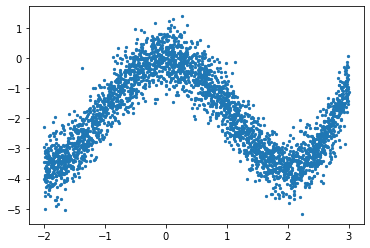

In [18]:
smps = base._sample(3000)

plt.scatter(smps["X"], smps["Y"],s=5)
plt.show()

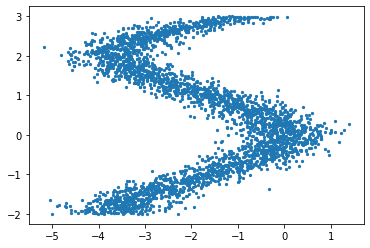

In [19]:
plt.scatter(smps["Y"], smps["X"],s=5)
plt.show()

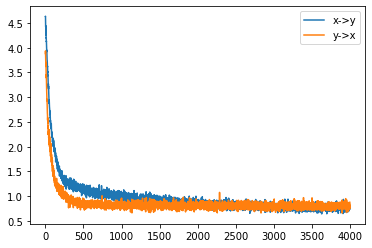

NameError: name 'np' is not defined

<Figure size 864x864 with 0 Axes>

In [20]:
modelxy = MDN([1,30],10)
lossxy = modelxy.fit(base,"X","Y", lr =1e-3, epoch=4000, loss_type="EM")

modelyx = MDN([1,30],10)
lossyx = modelyx.fit(base,"Y","X", lr =1e-3, epoch=4000, loss_type="EM")
plt.plot(lossxy,label="x->y")
plt.plot(lossyx,label="y->x")
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plot(base, modelxy,"X","Y")
plt.figure(figsize=(12,12))
plot(base, modelyx,"Y","X")
#plot(transfer, modelxy,"X","Y")
#plot(base, modelyx,"Y","X")

In [ ]:
plt.figure(figsize=(12,12))
plot(transfer, modelxy,"X","Y")
plot(transfer, modelyx,"Y","X")

In [ ]:
plt.plot(lossxy,label="x->y")
plt.plot(lossyx,label="y->x")
plt.legend()
plt.show()

In [26]:
a = modelxy.sample( base._sample(3000)["X"] )
b = modelyx.sample( base._sample(3000)["Y"] )

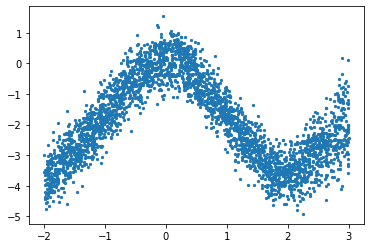

In [27]:
plt.scatter( a[:,0], a[:,1],s=5)
plt.show()

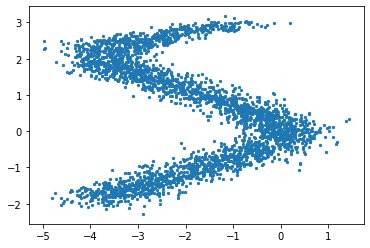

In [28]:
plt.scatter( b[:,0], b[:,1],s=5)
plt.show()

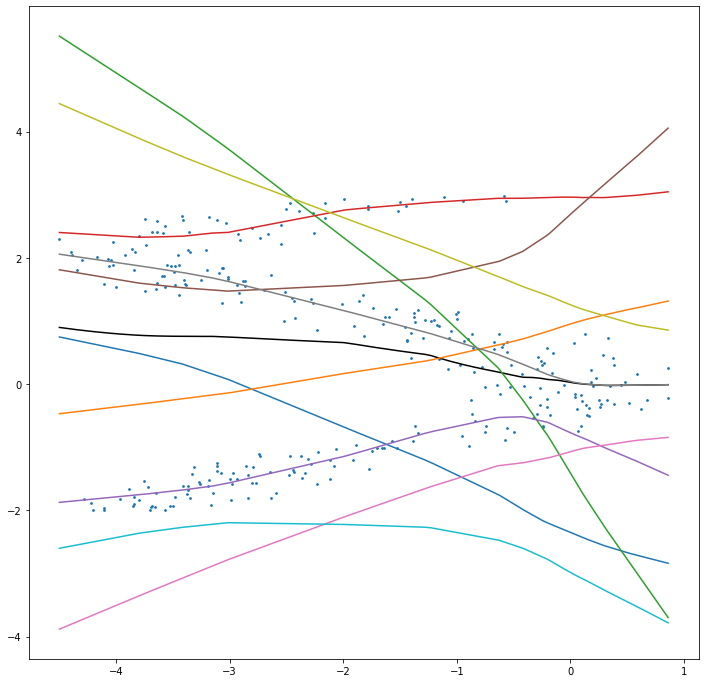

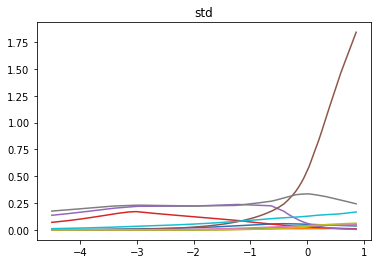

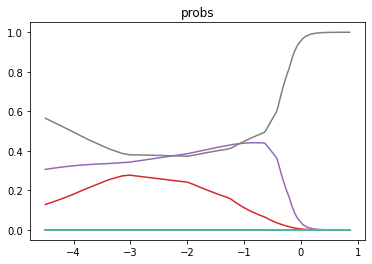

MDN(
  (z_h): Sequential(
    (0): Linear(in_features=1, out_features=30, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
  )
  (z_pi): Linear(in_features=30, out_features=10, bias=True)
  (z_mu): Linear(in_features=30, out_features=10, bias=True)
  (z_sigma): Linear(in_features=30, out_features=10, bias=True)
)

In [29]:
plt.figure(figsize=(12,12))
plot(base, modelyx,"Y","X")

FloatingPointError: underflow encountered in exp

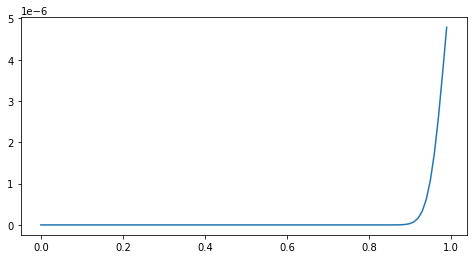

In [13]:
from scipy.stats import norm as normal
def plot_normal_mix(x,pis, mus, sigmas, ax, label='', comp=True):
    """
    Plots the mixture of Normal models to axis=ax
    comp=True plots all components of mixtur model
    """
    #x = np.linspace(-10.5, 10.5, 250)
    final = np.zeros_like(x)
    for i, (weight_mix, mu_mix, sigma_mix) in enumerate(zip(pis, mus, sigmas)):
        temp = normal.pdf(x, mu_mix, sigma_mix) * weight_mix
        final = final + temp
        if comp:
            ax.plot(x, temp, label='Normal ' + str(i))
    ax.plot(x, final, label='Mixture of Normals ' + label)
    #ax.legend(fontsize=6)
    
def interactiveplot(xx,yy,model):

    for ii in xx:
        X_train = torch.tensor( [[ii]], dtype=torch.float32)
        
        #print(X_train.shape)
        pis, mus, sigmas = model.forward(X_train)
        
        ##
        pis = list(pis.detach().numpy().ravel())
        mus = list(mus.detach().numpy().ravel())
        sigmas = list(sigmas.detach().numpy().ravel())
        fig, axes = plt.subplots(figsize=(8, 4))

        plot_normal_mix( 
            yy,
            pis,
            mus,
            sigmas,
            axes,
            comp=True
        )

yy= np.arange(0,1,0.01)
xx= np.arange(1.2,5,0.2) 
interactiveplot(
    xx,
    yy, 
    modelxy
)

FloatingPointError: underflow encountered in exp

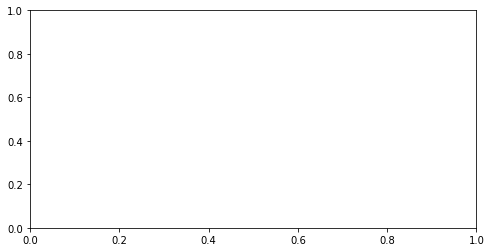

In [74]:
yy= np.arange(-6,2,0.2)
xx= np.arange(-2,4,0.1) 
interactiveplot(
    yy,
    xx, 
    modelyx
)

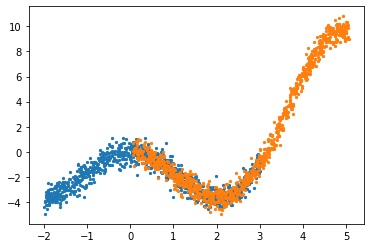

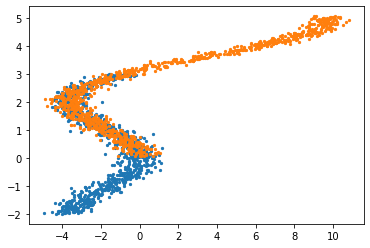

In [15]:
smps = base._sample(1000)
ints = transfer._sample(1000)

plt.scatter(smps["X"], smps["Y"],s=5)
plt.scatter(ints["X"], ints["Y"],s=5)
plt.show()
plt.scatter(smps["Y"], smps["X"],s=5)
plt.scatter(ints["Y"], ints["X"],s=5)
plt.show()

In [16]:
from pycausal.inference import meta_objective

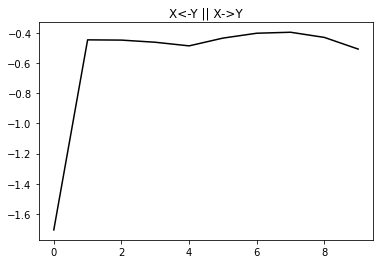

In [24]:
l1 , g = meta_objective(transfer,"X","Y",modelxy,modelyx,
              lr=1e-2, metalr=1e-1,episodes=500, 
              steps=10)

l1 = np.mean(np.array(
        list(
            l1.values()
        ) ), axis=0)


plt.title("X<-Y || X->Y")
plt.plot( l1, label="x->y", color="black")

plt.show()

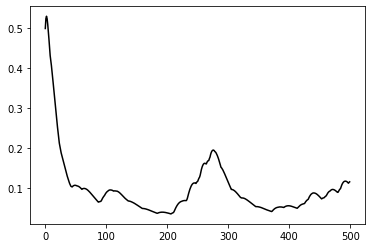

In [25]:
#print(g)
plt.plot(g, color="black")

#plt.legend()
plt.show()

In [6]:
from pycausal.inference import binary_causal_inference_with_interventions

In [7]:
binary_causal_inference_with_interventions(base,transfer,"X","Y")

0.3960804